# Libraries and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from scipy import stats
print("Libraries Imported")
#Lets import and check the dataset
#Attaching google drive
from google.colab import drive
drive.mount('/content/gdrive')

Libraries Imported
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Variables
base_loc = '/content/gdrive/My Drive/upgrad/research/data/'
data_loc = base_loc + 'data.csv'
cluster2_loc = base_loc + 'cluster2.csv'
cluster7_loc = base_loc + 'cluster7.csv'

In [3]:
#Gameplay data
data = pd.read_csv(data_loc)
data.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863,0.00000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.000000,0.201402,0.

In [0]:
#Bringing forever average into a two week scale
#data.forever_avg = data.forever_avg*14
#data.forever_avg

In [5]:
data.count()[1]

60358

In [0]:
# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA 

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [0]:
columns_list = data.columns.values

Genre_columns = []
for x in columns_list:
  if 'Genre' in x and 'deviation' not in x:
    Genre_columns.append(x)

Playtime_2weeks_bygenre_columns = []
for x in columns_list:
  if 'Playtime_2weeks_bygenre' in x and 'deviation' not in x:
    Playtime_2weeks_bygenre_columns.append(x)

Playtime_forever_bygenre_columns = []
for x in columns_list:
  if 'Playtime_forever_bygenre' in x and 'deviation' not in x:
    Playtime_forever_bygenre_columns.append(x)

In [8]:
drop_list = ['steamid','playtime_forever','Price','commentpermission','free_to_play','Is_Multiplayer', 'Is_Adult', 'unplayed',
                            'total_achievements','Playtime_forever_total' ,'Playtime_2weeks_total' , 'Genre_total'
                            ,'playtime_age' , 'Type_demo', 'Type_dlc', 'Type_game', 'Type_mod', 'Type_Unknown'
                            ] + Genre_columns + Playtime_2weeks_bygenre_columns + Playtime_forever_bygenre_columns
drop_list

['steamid',
 'playtime_forever',
 'Price',
 'commentpermission',
 'free_to_play',
 'Is_Multiplayer',
 'Is_Adult',
 'unplayed',
 'total_achievements',
 'Playtime_forever_total',
 'Playtime_2weeks_total',
 'Genre_total',
 'playtime_age',
 'Type_demo',
 'Type_dlc',
 'Type_game',
 'Type_mod',
 'Type_Unknown',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Casual',
 'Genre_Early',
 'Genre_Free',
 'Genre_Indie',
 'Genre_Massively_Multiplayer',
 'Genre_RPG',
 'Genre_Racing',
 'Genre_Simulation',
 'Genre_Sports',
 'Genre_Strategy',
 'Genre_Unknown',
 'Genre_total',
 'Playtime_2weeks_bygenre_Action',
 'Playtime_2weeks_bygenre_Adventure',
 'Playtime_2weeks_bygenre_Casual',
 'Playtime_2weeks_bygenre_Early',
 'Playtime_2weeks_bygenre_Free',
 'Playtime_2weeks_bygenre_Indie',
 'Playtime_2weeks_bygenre_Massively_Multiplayer',
 'Playtime_2weeks_bygenre_RPG',
 'Playtime_2weeks_bygenre_Racing',
 'Playtime_2weeks_bygenre_Simulation',
 'Playtime_2weeks_bygenre_Sports',
 'Playtime_2weeks_bygenre_Strategy',
 

In [9]:
data_for_scale = data.drop(drop_list,axis=1)

standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(data_for_scale)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = data_for_scale.columns
scaled_data.head()

,realname,playtime_2weeks,no_of_games,Rating,Required_Age,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,loggoff_duration,account_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage
0,0.888149,-0.652082,2.330124,-0.829897,-0.219972,0.409371,0.408958,0.325237,-0.529263,-0.470999,0.235216,-1.844016,2.419877,1.204457,0.617154,-0.627365,-0.319998,-0.732272,-0.199726,0.327473
1,0.888149,-0.179698,2.077523,-0.143548,0.023819,0.074562,2.125387,-0.170612,-0.654697,1.608397,2.280303,-1.844016,2.419877,-0.237131,0.808139,-0.496444,-0.336904,-0.353466,-0.174298,0.088683
2,-1.125937,2.347738,0.009356,0.436835,-0.850752,0.972606,-0.449256,2.145825,0.151135,-0.802736,-0.917865,-1.326860,2.419877,1.204457,-0.433403,-0.082632,-0.061042,0.036336,-0.527105,1.180182
3,0.888149,0.736679,-0.858958,1.721069,0.308669,2.185175,0.730789,-0.047366,0.335909,-0.553541,1.497079,-1.299641,2.419877,-0.756256,-0.903361,0.722129,0.269350,1.155356,-0.527105,0.636882
4,0.888149,1.203627,1.777560,-0.288994,-0.625371,0.255113,-0.556533,-1.112470,-0.976283,-0.101474,-0.134640,-1.326860,2.419877,-0.336545,0.344404,-0.275292,-0.403802,-0.574863,-0.527105,0.798751


In [0]:
#scaled_data.isna().sum()

# Choosing K

In [0]:
# sum of squared distances
#"""
ssd = []
for num_clusters in range(1,21):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(scaled_data)
    ssd.append(model_clus.inertia_)

#"""

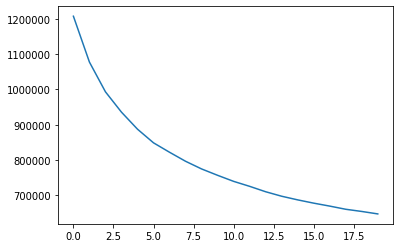

In [12]:
plt.plot(ssd)
#2 looks ok


In [13]:
round(ssd[0]-ssd[1]) #200179.0
round(ssd[1]-ssd[2]) #105711.0
round(ssd[2]-ssd[3]) #73947.0
round(ssd[3]-ssd[4]) # 53419.0

48205.0

# Using 2 Clusters

In [14]:
# Kmeans with K=2
model_clus = KMeans(n_clusters = 2, max_iter=50)
model_clus.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
pd.unique(model_clus.labels_)

array([1, 0])

In [16]:
# analysis of clusters formed
data.index = pd.RangeIndex(len(data.index))
data_km = pd.concat([data, pd.Series(model_clus.labels_)], axis=1)
data_km.head()

columns = data_km.columns[:-1].values
columns = list(columns)+['ClusterID']
data_km.columns = columns

data_km.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total,ClusterID
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394,1
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369,1
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121,0
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863,0.00000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.00

In [17]:
#Count of Clusters
data_km.loc[:,['ClusterID','steamid']].groupby(['ClusterID']).count()

#19009 cluster 0
#41349 cluster 1

,steamid
ClusterID,
0,38162
1,22196


In [0]:
#Write to file
data_km.to_csv(cluster2_loc,index=False)

In [19]:
pd.unique(data_km.ClusterID)
len(data_km.columns) #78
data_km.drop(['steamid'],axis=1).columns[:len(data_km.columns)-2].values

array(['commentpermission', 'realname', 'playtime_2weeks',
       'playtime_forever', 'no_of_games', 'free_to_play', 'Price',
       'Rating', 'Required_Age', 'Is_Multiplayer', 'Is_Adult', 'unplayed',
       'game_age', 'no_of_groups', 'avg_friend_duration',
       'avg_percentage_completion', 'total_group_connections',
       'total_friend_connections', 'total_achievements',
       'loggoff_duration', 'account_age', 'Genre_Action',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Early', 'Genre_Free',
       'Genre_Indie', 'Genre_Massively_Multiplayer', 'Genre_RPG',
       'Genre_Racing', 'Genre_Simulation', 'Genre_Sports',
       'Genre_Strategy', 'Genre_Unknown',
       'Playtime_2weeks_bygenre_Action',
       'Playtime_2weeks_bygenre_Adventure',
       'Playtime_2weeks_bygenre_Casual', 'Playtime_2weeks_bygenre_Early',
       'Playtime_2weeks_bygenre_Free', 'Playtime_2weeks_bygenre_Indie',
       'Playtime_2weeks_bygenre_Massively_Multiplayer',
       'Playtime_2weeks_bygenre_RPG', 

In [20]:
cluster_means = pd.DataFrame()

for columns in data_km.drop(['steamid'],axis=1).columns[:len(data_km.columns)-2]:
  a = pd.DataFrame(data_km.groupby(["ClusterID"])[columns].mean())
  cluster_means = pd.concat([cluster_means,a],axis=1)

cluster_means.reset_index(level=0, inplace=True)
cluster_means.head()

,ClusterID,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,0,0.0,0.461611,6808.341308,113036.858911,40.080053,2.261962,566.139922,80.088762,4.487937,19.534223,0.332359,11.576961,3732.977847,4.694709,324.642896,14.524913,3.945774e+05,34.803338,2556.677585,135.093575,1283.954549,0.423567,0.076672,0.017529,0.000313,0.035805,0.091733,0.003474,0.092310,0.005973,0.043757,0.004811,0.140784,0.063272,0.330211,0.038412,0.005087,0.000246,0.134314,0.08114,0.010926,0.121466,0.002743,0.001251,0.003091,0.228015,0.043097,0.377805,0.041409,0.004806,0.000139,0.135235,0.070386,0.007929,0.115874,0.002278,0.000079,0.002144,0.201666,0.040251,0.000501,0.003338,0.897385,0.004882,0.093894,1070.069598,115.085385,0.585627,67.797893,0.089584,0.545963,0.007297,0.264755,205798.059431,14075.003118,65.140192
1,1,0.0,0.726527,6895.729636,174645.845760,133.426969,5.071860,1773.933484,78.590458,4.255568,53.434267,0.960646,45.619616,3716.585972,14.193593,416.775016,14.283852,1.796197e+06,68.482700,7528.121238,117.837989,1543.667688,0.362139,0.103226,0.043336,0.000451,0.012254,0.153781,0.001678,0.092687,0.008868,0.035887,0.007683,0.123551,0.054458,0.333285,0.055004,0.012025,0.000297,0.134090,0.10352,0.013166,0.123960,0.003974,0.001079,0.004008,0.187558,0.028032,0.392248,0.053430,0.010500,0.000111,0.143302,0.090131,0.008484,0.120592,0.003181,0.000051,0.002906,0.148162,0.026902,0.000889,0.004548,1.011308,0.003695,0.094647,1232.470851,147.797842,1.597608,58.004870,0.044012,0.422032,0.007176,0.335010,330068.576095,14924.403226,270.142548


In [21]:
data_km[data_km.steamid.isin(['76561197960275312','76561197960269752'])]
#data_km[data_km.steamid.isin(['76561197960269425','76561197960269752'])]
#data_km[data_km.steamid.isin(['76561197961805932','76561197960270328'])]
#data_km[data_km.steamid.isin(['76561197960327533','76561197960278199'])]

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total,ClusterID
3,76561197960269752,0.0,1,8060.0,102719.0,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.018863,0.000000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.000000,0.201402,0.000000,0.0,0.000000,1.000000,0.0,0.000000,1586,64.766078,0.166974,77.80,0.100000,0.700000,0.000000,0.400000,180693.0,8376.0,27,0
17,76561197960275312,0.0,0,5947.0,196950.0,225.0,11.0,3052.89,74.390528,1.923913,90.5,2.5,80.0,3462.796584,5.0,415.272727,13.854255,10852.0,11.0,12654.0,80.0,3334.5,0.232639,0.118056,0.097718,0.000992,0.002480,0.152778,0.001488,0.064980,0.028274,0.054067,0.012401,0.128968,0.105159,0.474893,0.453243,0.008232,0.0,0.000000,0.021403,0.0,0.008479,0.00107,0.008973,0.008232,0.009055,0.006421,0.456436,0.046937,0.071673,0.000144,0.010783,0.037704,0.010657,0.260880,0.004915,0.000383,0.003208,0.081124,0.015157,0.0,0.035556,4.791111,0.0,0.897778,1586,124.180328,1.924899,56.24,0.048889,0.402222,0.011111,0.355556,284614.0,12148.0,2016,1


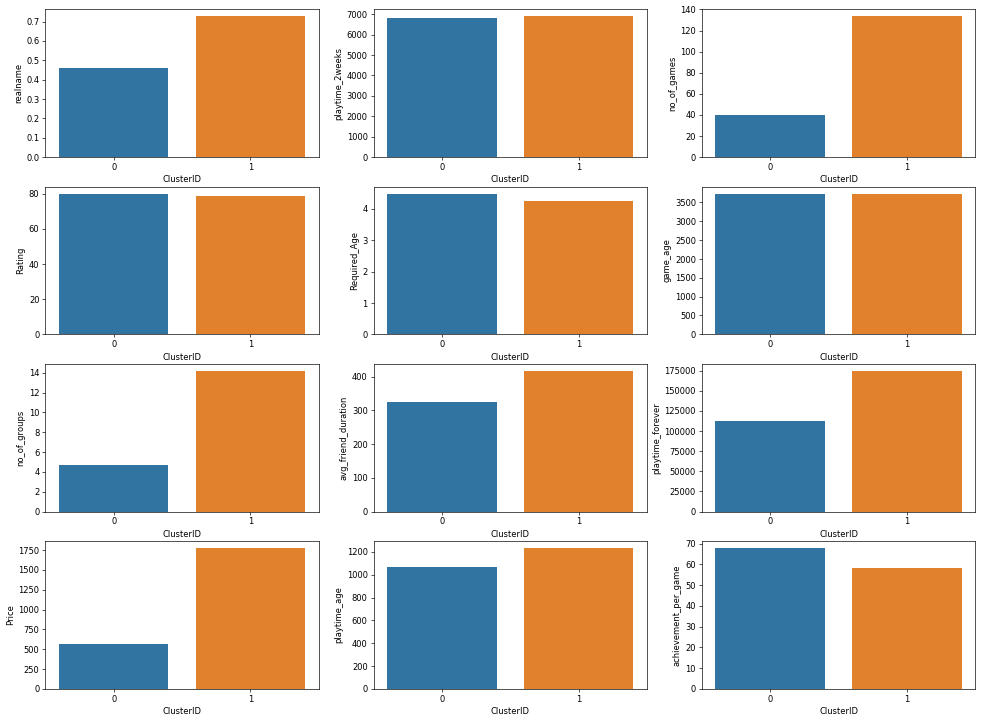

In [22]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'realname',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'playtime_2weeks',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'no_of_games',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Rating',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Required_Age',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'game_age',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'no_of_groups',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'avg_friend_duration',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'playtime_forever',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Price',data=cluster_means)

plt.subplot(4, 3, 11)
sns.barplot('ClusterID', 'playtime_age',data=cluster_means)

plt.subplot(4, 3, 12)
sns.barplot('ClusterID', 'achievement_per_game',data=cluster_means)

plt.show()

#We can see differences in no of games and hence Price

In [23]:
'''
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(3, 3, 1)
sns.barplot('ClusterID', 'Genre_deviation',data=cluster_means)

plt.subplot(3, 3, 2)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_deviation',data=cluster_means)

plt.subplot(3, 3, 3)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_deviation',data=cluster_means)
'''

"\nfrom matplotlib.pyplot import figure\nfigure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')\n\nplt.subplot(3, 3, 1)\nsns.barplot('ClusterID', 'Genre_deviation',data=cluster_means)\n\nplt.subplot(3, 3, 2)\nsns.barplot('ClusterID', 'Playtime_2weeks_bygenre_deviation',data=cluster_means)\n\nplt.subplot(3, 3, 3)\nsns.barplot('ClusterID', 'Playtime_forever_bygenre_deviation',data=cluster_means)\n"

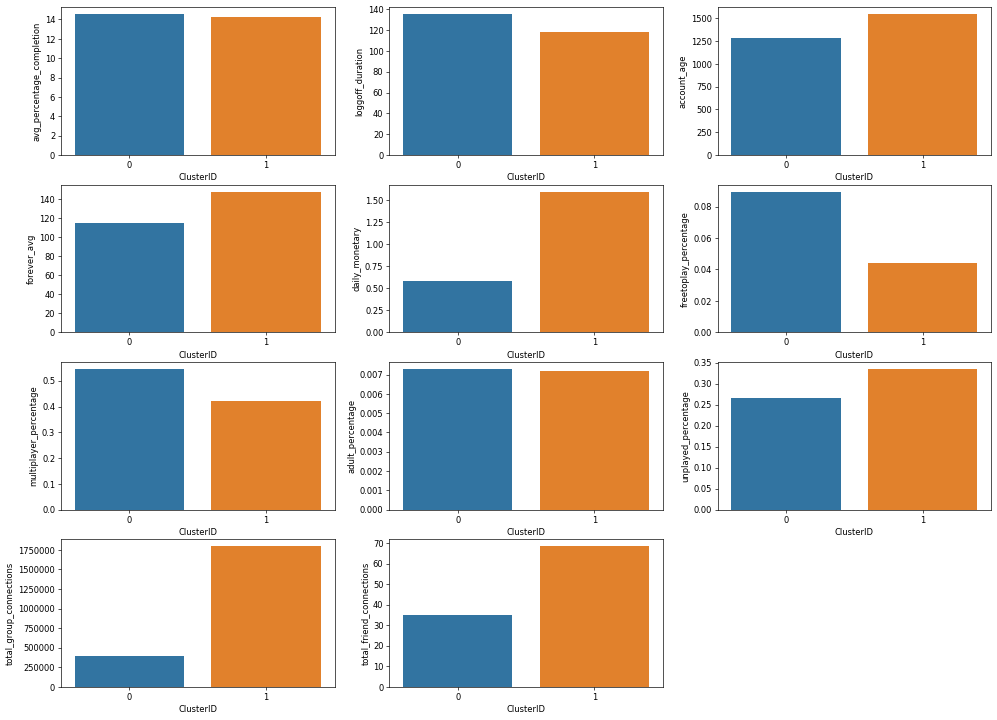

In [24]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4,3, 1)
sns.barplot('ClusterID', 'avg_percentage_completion',data=cluster_means)

plt.subplot(4,3, 2)
sns.barplot('ClusterID', 'loggoff_duration',data=cluster_means)

plt.subplot(4,3, 3)
sns.barplot('ClusterID', 'account_age',data=cluster_means)

plt.subplot(4,3, 4)
sns.barplot('ClusterID', 'forever_avg',data=cluster_means)

plt.subplot(4,3, 5)
sns.barplot('ClusterID', 'daily_monetary',data=cluster_means)

plt.subplot(4,3, 6)
sns.barplot('ClusterID', 'freetoplay_percentage',data=cluster_means)

plt.subplot(4,3, 7)
sns.barplot('ClusterID', 'multiplayer_percentage',data=cluster_means)

plt.subplot(4,3, 8)
sns.barplot('ClusterID', 'adult_percentage',data=cluster_means)

plt.subplot(4,3, 9)
sns.barplot('ClusterID', 'unplayed_percentage',data=cluster_means)

plt.subplot(4,3, 10)
sns.barplot('ClusterID', 'total_group_connections',data=cluster_means)

plt.subplot(4,3, 11)
sns.barplot('ClusterID', 'total_friend_connections',data=cluster_means)

plt.show()

#We can see differences in forever average, daily expenses, 
#freetoplay percentage and multiplayer percentage, adult percentage, unplayed percentage

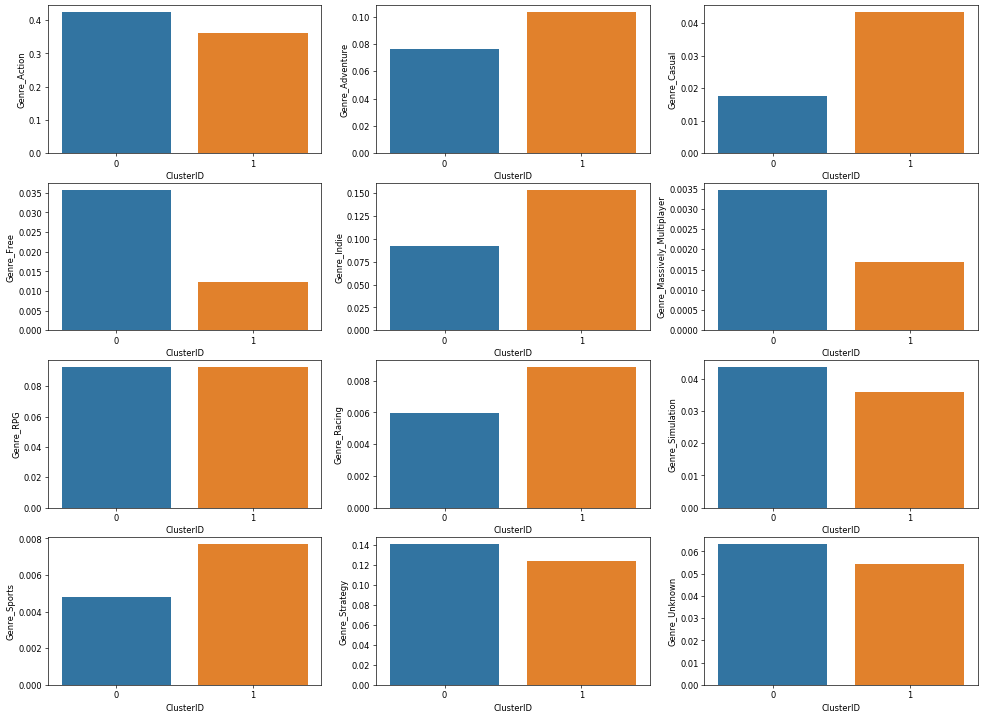

In [25]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'Genre_Action',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'Genre_Adventure',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'Genre_Casual',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Genre_Free',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Genre_Indie',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'Genre_Massively_Multiplayer',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'Genre_RPG',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'Genre_Racing',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'Genre_Simulation',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Genre_Sports',data=cluster_means)

plt.subplot(4, 3, 11)
sns.barplot('ClusterID', 'Genre_Strategy',data=cluster_means)

plt.subplot(4, 3, 12)
sns.barplot('ClusterID', 'Genre_Unknown',data=cluster_means)

plt.show()

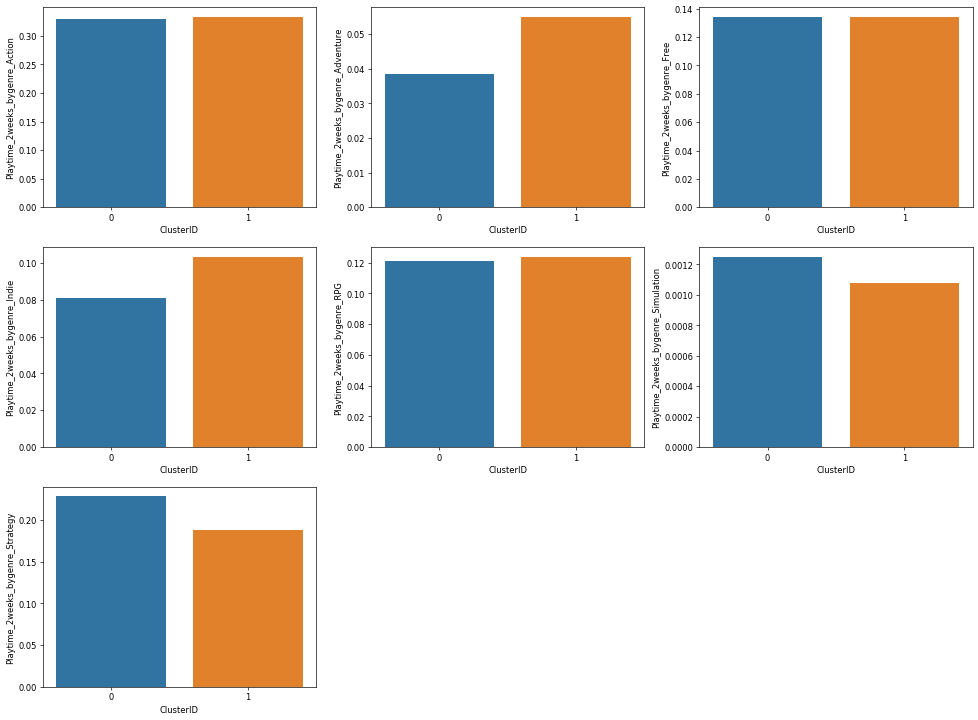

In [26]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(3, 3, 1)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Action',data=cluster_means)

plt.subplot(3, 3, 2)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Adventure',data=cluster_means)

plt.subplot(3, 3, 3)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Free',data=cluster_means)

plt.subplot(3, 3, 4)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Indie',data=cluster_means)

plt.subplot(3, 3, 5)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_RPG',data=cluster_means)

plt.subplot(3, 3, 6)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Simulation',data=cluster_means)

plt.subplot(3, 3, 7)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Strategy',data=cluster_means)

plt.show()

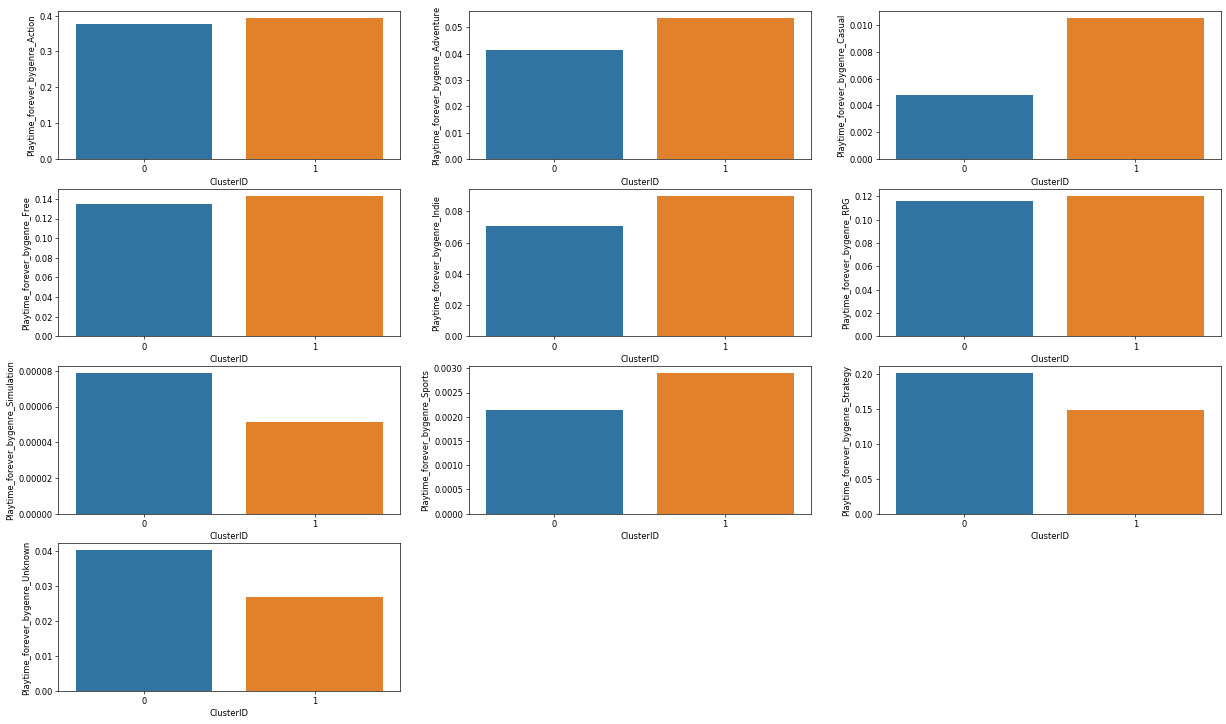

In [27]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Action',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Adventure',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Casual',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Free',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Indie',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_RPG',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Simulation',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Sports',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Strategy',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Unknown',data=cluster_means)

plt.show()

# Using 7 Clusters

In [28]:
# Kmeans with K=7
model_clus = KMeans(n_clusters = 7, max_iter=50)
model_clus.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
pd.unique(model_clus.labels_)

array([5, 0, 2, 6, 1, 4, 3])

In [30]:
# analysis of clusters formed
data.index = pd.RangeIndex(len(data.index))
data_km = pd.concat([data, pd.Series(model_clus.labels_)], axis=1)
data_km.head()

columns = data_km.columns[:-1].values
columns = list(columns)+['ClusterID']
data_km.columns = columns

data_km.head()

,steamid,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total,ClusterID
0,76561197960269425,0.0,1,5761.0,359095.125,222.0,9.0,2375.87,77.747748,3.905405,83.0,1.0,77.0,3914.536036,12.0,432.500000,13.789975,379079.0,58.0,11628.0,61.0,3334.5,0.347716,0.098985,0.096447,0.002538,0.007614,0.208122,0.000000,0.083756,0.007614,0.020305,0.010152,0.104061,0.012690,0.572430,0.011098,0.287675,0.0,0.000000,0.075496,0.0,0.011098,0.0,0.001168,0.041034,0.000000,0.00000,0.126480,0.034038,0.233752,0.000119,0.022556,0.496072,0.000000,0.053008,0.000063,0.000003,0.001457,0.032430,0.000021,0.0,0.004505,0.972973,0.000000,0.022523,1586,226.415590,1.498026,52.378378,0.040541,0.373874,0.004505,0.346847,2330534.0,6848.0,394,5
1,76561197960269501,0.0,1,6543.0,170598.000,206.0,8.0,2641.03,79.228155,4.456311,90.5,1.0,63.0,3761.116505,28.0,319.717105,13.636806,2723055.0,152.0,11298.0,61.0,3334.5,0.357724,0.075881,0.070461,0.000000,0.008130,0.197832,0.002710,0.051491,0.010840,0.051491,0.008130,0.132791,0.032520,0.064735,0.007774,0.000000,0.0,0.000000,0.041413,0.0,0.000000,0.0,0.002686,0.000000,0.030813,0.85258,0.507494,0.054859,0.005600,0.000000,0.134056,0.059518,0.000077,0.074155,0.002563,0.000066,0.000084,0.112939,0.048590,0.0,0.004854,0.927184,0.009709,0.058252,1586,107.564943,1.665214,54.844660,0.038835,0.439320,0.004854,0.305825,287156.0,7075.0,369,0
2,76561197960269721,0.0,0,10727.0,359095.125,75.0,5.0,917.30,80.480000,2.480000,38.0,0.0,37.0,4172.626667,4.0,846.600000,14.620819,5133.0,5.0,4698.0,80.0,3334.5,0.347107,0.099174,0.016529,0.000000,0.024793,0.115702,0.008264,0.181818,0.000000,0.024793,0.000000,0.165289,0.016529,0.000052,0.000052,0.000000,0.0,0.000000,0.000052,0.0,0.000052,0.0,0.000157,0.000000,0.999635,0.00000,0.261675,0.052906,0.000556,0.000000,0.025541,0.065929,0.021525,0.131212,0.000000,0.000006,0.000000,0.409037,0.031613,0.0,0.000000,0.960000,0.013333,0.026667,1586,226.415590,0.578373,62.640000,0.066667,0.506667,0.000000,0.493333,503651.0,19154.0,121,5
3,76561197960269752,0.0,1,8060.0,102719.000,20.0,2.0,264.82,83.250000,5.100000,14.0,0.0,8.0,4728.261932,15.0,347.750000,14.846449,286035.0,116.0,1556.0,81.0,3334.5,0.629630,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.259259,0.000000,0.000000,0.000000,0.037037,0.000000,0.962273,0.000000,0.000000,0.0,0.018863,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018863,0.00000,0.523047,0.000000,0.000000,0.000000,0.208763,0.000000,0.000000,0.066787,0.000000,0.000000,0.00

In [31]:
#Count of Clusters
data_km.loc[:,['ClusterID','steamid']].groupby(['ClusterID']).count()

,steamid
ClusterID,
0,8874
1,9471
2,5072
3,14201
4,1383
5,13012
6,8345


In [0]:
#Write to file
data_km.to_csv(cluster7_loc,index=False)

In [33]:
pd.unique(data_km.ClusterID)
len(data_km.columns) #78
data_km.drop(['steamid'],axis=1).columns[:len(data_km.columns)-2].values

array(['commentpermission', 'realname', 'playtime_2weeks',
       'playtime_forever', 'no_of_games', 'free_to_play', 'Price',
       'Rating', 'Required_Age', 'Is_Multiplayer', 'Is_Adult', 'unplayed',
       'game_age', 'no_of_groups', 'avg_friend_duration',
       'avg_percentage_completion', 'total_group_connections',
       'total_friend_connections', 'total_achievements',
       'loggoff_duration', 'account_age', 'Genre_Action',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Early', 'Genre_Free',
       'Genre_Indie', 'Genre_Massively_Multiplayer', 'Genre_RPG',
       'Genre_Racing', 'Genre_Simulation', 'Genre_Sports',
       'Genre_Strategy', 'Genre_Unknown',
       'Playtime_2weeks_bygenre_Action',
       'Playtime_2weeks_bygenre_Adventure',
       'Playtime_2weeks_bygenre_Casual', 'Playtime_2weeks_bygenre_Early',
       'Playtime_2weeks_bygenre_Free', 'Playtime_2weeks_bygenre_Indie',
       'Playtime_2weeks_bygenre_Massively_Multiplayer',
       'Playtime_2weeks_bygenre_RPG', 

In [34]:
cluster_means = pd.DataFrame()

for columns in data_km.drop(['steamid'],axis=1).columns[:len(data_km.columns)-2]:
  a = pd.DataFrame(data_km.groupby(["ClusterID"])[columns].mean())
  cluster_means = pd.concat([cluster_means,a],axis=1)

cluster_means.reset_index(level=0, inplace=True)
cluster_means.head()

,ClusterID,commentpermission,realname,playtime_2weeks,playtime_forever,no_of_games,free_to_play,Price,Rating,Required_Age,Is_Multiplayer,Is_Adult,unplayed,game_age,no_of_groups,avg_friend_duration,avg_percentage_completion,total_group_connections,total_friend_connections,total_achievements,loggoff_duration,account_age,Genre_Action,Genre_Adventure,Genre_Casual,Genre_Early,Genre_Free,Genre_Indie,Genre_Massively_Multiplayer,Genre_RPG,Genre_Racing,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Unknown,Playtime_2weeks_bygenre_Action,Playtime_2weeks_bygenre_Adventure,Playtime_2weeks_bygenre_Casual,Playtime_2weeks_bygenre_Early,Playtime_2weeks_bygenre_Free,Playtime_2weeks_bygenre_Indie,Playtime_2weeks_bygenre_Massively_Multiplayer,Playtime_2weeks_bygenre_RPG,Playtime_2weeks_bygenre_Racing,Playtime_2weeks_bygenre_Simulation,Playtime_2weeks_bygenre_Sports,Playtime_2weeks_bygenre_Strategy,Playtime_2weeks_bygenre_Unknown,Playtime_forever_bygenre_Action,Playtime_forever_bygenre_Adventure,Playtime_forever_bygenre_Casual,Playtime_forever_bygenre_Early,Playtime_forever_bygenre_Free,Playtime_forever_bygenre_Indie,Playtime_forever_bygenre_Massively_Multiplayer,Playtime_forever_bygenre_RPG,Playtime_forever_bygenre_Racing,Playtime_forever_bygenre_Simulation,Playtime_forever_bygenre_Sports,Playtime_forever_bygenre_Strategy,Playtime_forever_bygenre_Unknown,Type_demo,Type_dlc,Type_game,Type_mod,Type_Unknown,playtime_age,forever_avg,daily_monetary,achievement_per_game,freetoplay_percentage,multiplayer_percentage,adult_percentage,unplayed_percentage,Playtime_forever_total,Playtime_2weeks_total,Genre_total
0,0,0.0,0.740478,6732.912215,188879.838742,65.607054,3.975547,883.222870,79.557177,4.630578,31.447205,0.476504,17.687514,3818.604525,23.193318,358.877860,14.625608,2.342302e+06,103.689204,4103.326572,125.481068,1293.557528,0.430691,0.083361,0.030846,0.000385,0.026488,0.124177,0.002175,0.079930,0.007205,0.038240,0.011143,0.104768,0.060590,0.393095,0.030540,0.004183,0.000133,0.196975,0.108737,0.006857,0.078532,0.002112,0.000590,0.002527,0.160167,0.015550,0.461296,0.028204,0.003060,0.000044,0.214533,0.093737,0.003444,0.062553,0.001430,0.000016,0.001972,0.117526,0.012184,0.001007,0.002449,0.898097,0.007160,0.091288,1147.642213,172.906182,0.807559,66.298349,0.074298,0.511329,0.006699,0.251289,350132.863309,14136.371422,107.591278
1,1,0.0,0.457185,6752.194911,103157.872915,29.576286,1.946679,448.328870,81.474164,5.474212,13.543026,0.121423,5.680710,3593.878205,3.959138,305.408767,15.774821,3.935250e+05,29.714075,1978.667617,141.815859,1025.762644,0.417467,0.096483,0.016792,0.000195,0.033925,0.091327,0.003240,0.112428,0.004646,0.040023,0.006112,0.116319,0.061043,0.332016,0.045185,0.004384,0.000192,0.135286,0.084091,0.007748,0.144494,0.003216,0.001480,0.003852,0.206908,0.031147,0.379891,0.050219,0.004316,0.000105,0.142819,0.071020,0.005706,0.135195,0.002034,0.000020,0.002363,0.176807,0.029504,0.000546,0.001584,0.902659,0.003628,0.091582,989.347271,111.313931,0.490868,69.891609,0.080559,0.497207,0.003207,0.172661,190994.323831,13759.993243,48.926196
2,2,0.0,0.462145,6900.169361,121985.415862,17.786278,1.687303,197.078874,79.045982,1.504179,12.416404,0.025039,7.326893,4516.157464,6.455737,272.157543,13.689188,3.750649e+05,52.630126,1168.188683,125.194006,1692.811416,0.646852,0.028005,0.006578,0.000161,0.054992,0.046907,0.002078,0.035920,0.004319,0.024533,0.002393,0.106301,0.040959,0.445965,0.010778,0.001498,0.000117,0.191412,0.050204,0.004942,0.031174,0.001740,0.000277,0.001341,0.227528,0.033024,0.515764,0.011232,0.001075,0.000059,0.172641,0.039950,0.003391,0.028254,0.001146,0.000009,0.000798,0.196762,0.028919,0.000353,0.001657,0.941058,0.002733,0.054199,1221.111199,113.667353,0.182223,65.591859,0.113412,0.764184,0.000856,0.401853,222640.541601,15069.821175,24.607453
3,3,0.0,0.506866,6732.607704,96191.652903,55.141046,2.553060,784.576666,79.069289,5.085255,25.241251,0.618970,17.481797,3533.665053,3.748363,253.737821,13.963101,4.024510e+05,29.055841,3433.5

In [0]:
#Write to file
#cluster_means.to_csv()

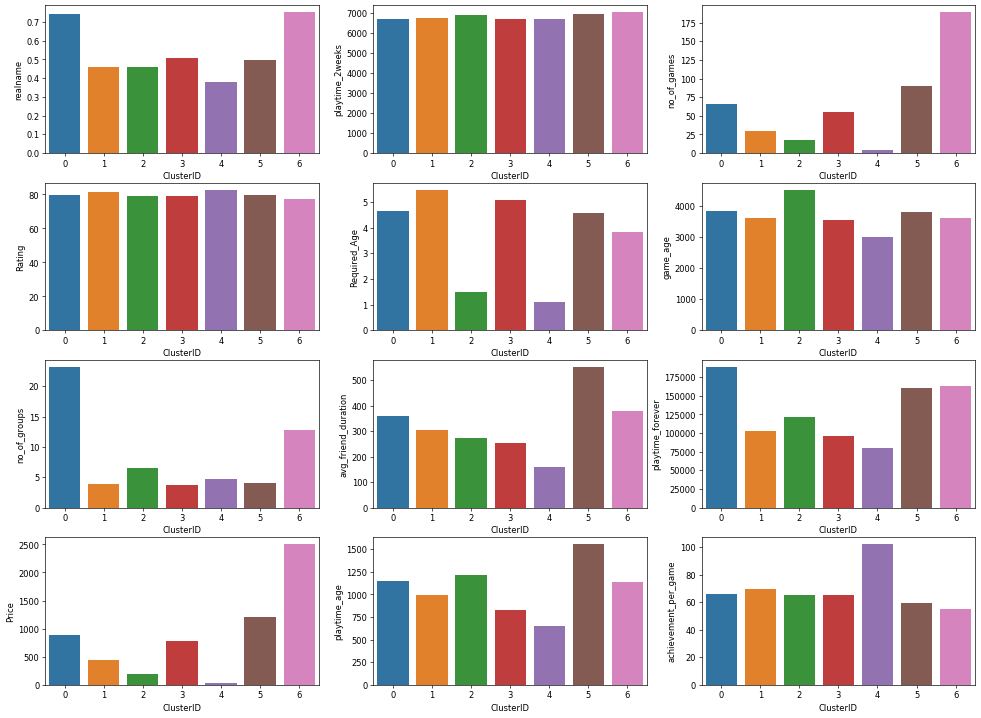

In [36]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'realname',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'playtime_2weeks',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'no_of_games',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Rating',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Required_Age',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'game_age',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'no_of_groups',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'avg_friend_duration',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'playtime_forever',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Price',data=cluster_means)

plt.subplot(4, 3, 11)
sns.barplot('ClusterID', 'playtime_age',data=cluster_means)

plt.subplot(4, 3, 12)
sns.barplot('ClusterID', 'achievement_per_game',data=cluster_means)

plt.show()

#We can see differences in no of games and hence Price

In [37]:
'''
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(3, 3, 1)
sns.barplot('ClusterID', 'Genre_deviation',data=cluster_means)

plt.subplot(3, 3, 2)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_deviation',data=cluster_means)

plt.subplot(3, 3, 3)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_deviation',data=cluster_means)
'''

"\nfrom matplotlib.pyplot import figure\nfigure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')\n\nplt.subplot(3, 3, 1)\nsns.barplot('ClusterID', 'Genre_deviation',data=cluster_means)\n\nplt.subplot(3, 3, 2)\nsns.barplot('ClusterID', 'Playtime_2weeks_bygenre_deviation',data=cluster_means)\n\nplt.subplot(3, 3, 3)\nsns.barplot('ClusterID', 'Playtime_forever_bygenre_deviation',data=cluster_means)\n"

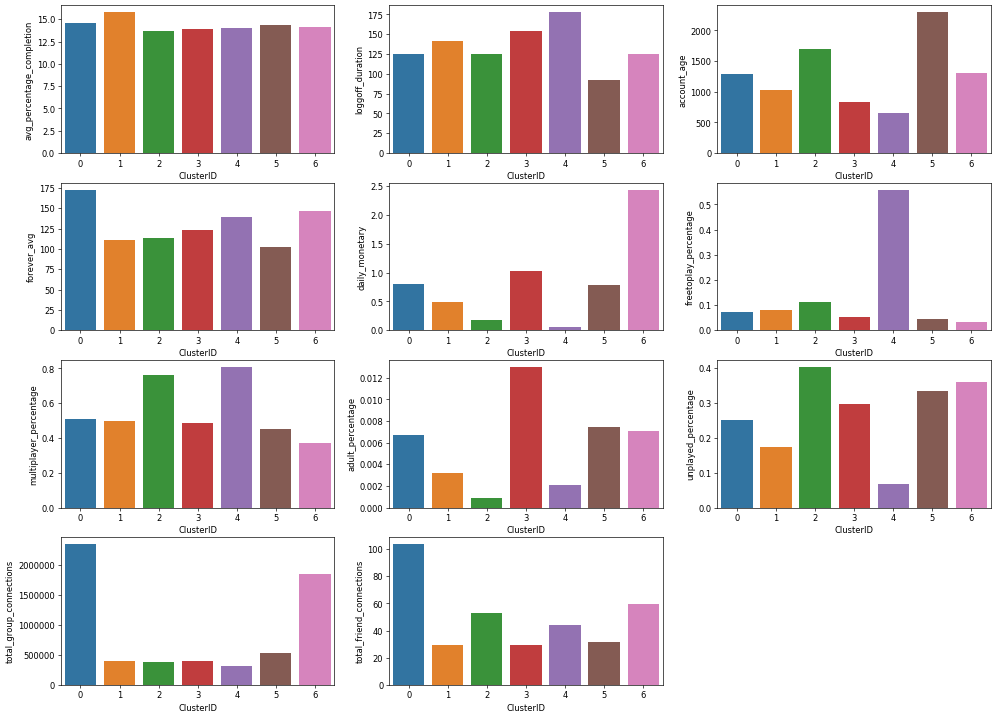

In [38]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4,3, 1)
sns.barplot('ClusterID', 'avg_percentage_completion',data=cluster_means)

plt.subplot(4,3, 2)
sns.barplot('ClusterID', 'loggoff_duration',data=cluster_means)

plt.subplot(4,3, 3)
sns.barplot('ClusterID', 'account_age',data=cluster_means)

plt.subplot(4,3, 4)
sns.barplot('ClusterID', 'forever_avg',data=cluster_means)

plt.subplot(4,3, 5)
sns.barplot('ClusterID', 'daily_monetary',data=cluster_means)

plt.subplot(4,3, 6)
sns.barplot('ClusterID', 'freetoplay_percentage',data=cluster_means)

plt.subplot(4,3, 7)
sns.barplot('ClusterID', 'multiplayer_percentage',data=cluster_means)

plt.subplot(4,3, 8)
sns.barplot('ClusterID', 'adult_percentage',data=cluster_means)

plt.subplot(4,3, 9)
sns.barplot('ClusterID', 'unplayed_percentage',data=cluster_means)

plt.subplot(4,3, 10)
sns.barplot('ClusterID', 'total_group_connections',data=cluster_means)

plt.subplot(4,3, 11)
sns.barplot('ClusterID', 'total_friend_connections',data=cluster_means)

plt.show()

#We can see differences in forever average, daily expenses, 
#freetoplay percentage and multiplayer percentage, adult percentage, unplayed percentage

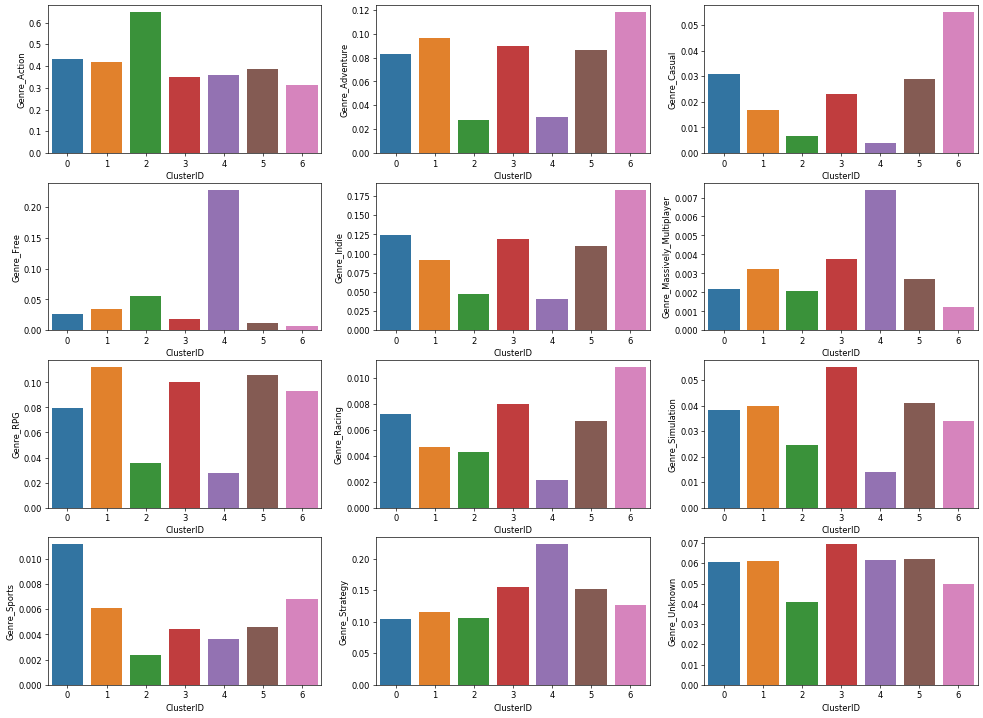

In [39]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'Genre_Action',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'Genre_Adventure',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'Genre_Casual',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Genre_Free',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Genre_Indie',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'Genre_Massively_Multiplayer',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'Genre_RPG',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'Genre_Racing',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'Genre_Simulation',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Genre_Sports',data=cluster_means)

plt.subplot(4, 3, 11)
sns.barplot('ClusterID', 'Genre_Strategy',data=cluster_means)

plt.subplot(4, 3, 12)
sns.barplot('ClusterID', 'Genre_Unknown',data=cluster_means)

plt.show()

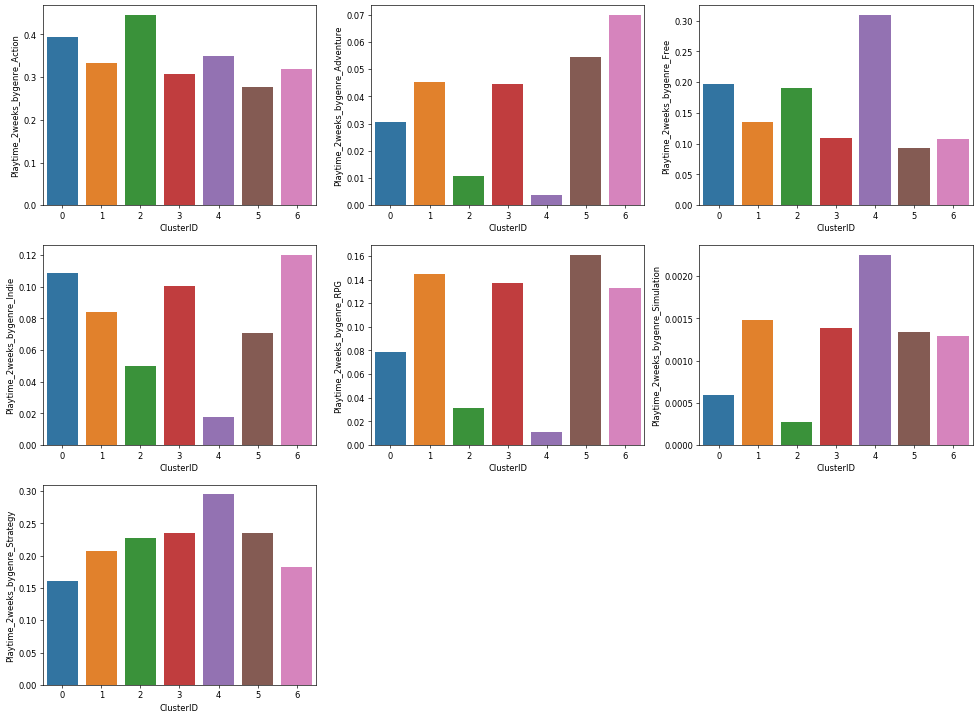

In [40]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(3, 3, 1)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Action',data=cluster_means)

plt.subplot(3, 3, 2)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Adventure',data=cluster_means)

plt.subplot(3, 3, 3)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Free',data=cluster_means)

plt.subplot(3, 3, 4)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Indie',data=cluster_means)

plt.subplot(3, 3, 5)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_RPG',data=cluster_means)

plt.subplot(3, 3, 6)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Simulation',data=cluster_means)

plt.subplot(3, 3, 7)
sns.barplot('ClusterID', 'Playtime_2weeks_bygenre_Strategy',data=cluster_means)

plt.show()

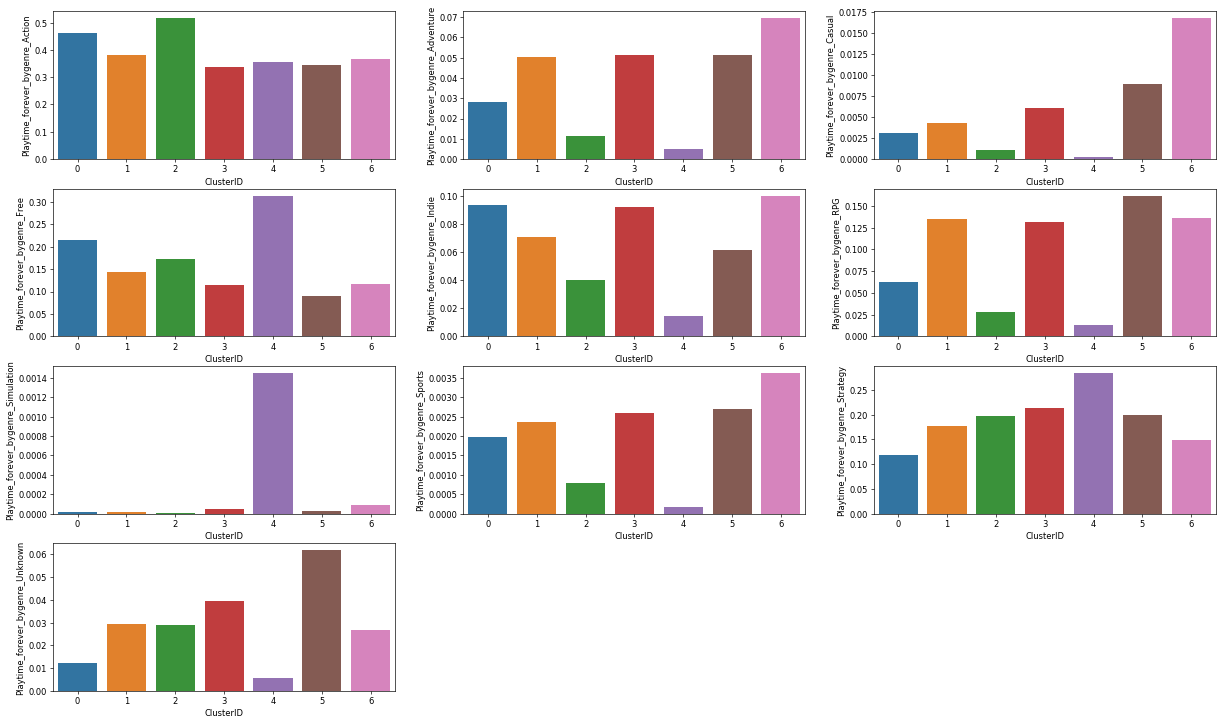

In [41]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 15), dpi=60, facecolor='w', edgecolor='k')

plt.subplot(4, 3, 1)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Action',data=cluster_means)

plt.subplot(4, 3, 2)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Adventure',data=cluster_means)

plt.subplot(4, 3, 3)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Casual',data=cluster_means)

plt.subplot(4, 3, 4)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Free',data=cluster_means)

plt.subplot(4, 3, 5)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Indie',data=cluster_means)

plt.subplot(4, 3, 6)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_RPG',data=cluster_means)

plt.subplot(4, 3, 7)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Simulation',data=cluster_means)

plt.subplot(4, 3, 8)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Sports',data=cluster_means)

plt.subplot(4, 3, 9)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Strategy',data=cluster_means)

plt.subplot(4, 3, 10)
sns.barplot('ClusterID', 'Playtime_forever_bygenre_Unknown',data=cluster_means)

plt.show()